<a href="https://colab.research.google.com/github/khushimusterya/Prodigytech_task1/blob/main/prodigytask_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Khushi Musterya   
Task : 2

#Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.

Here, Jobs in data dataset is used from kaggle

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
#Loading dataset
data = pd.read_csv('/content/jobs_in_data.csv')

In [6]:
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


Data Cleaning

In [7]:
#Determining the shape of the data
data.shape

(9355, 12)

In [16]:
#investigate the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [17]:
#determining the columns of the dataset
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [9]:
data.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [14]:
# Check for missing values
missing_values = data.isnull().sum()

In [15]:
# Drop columns with high number of missing values
data.dropna(axis=1, thresh=0.8, inplace=True)


In [21]:
# Impute missing values in remaining columns
data['salary'].fillna(data['salary'].mean(), inplace=True)
data['company_location'].fillna('Unknown', inplace=True)

In [22]:
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [24]:
# Check for duplicates
duplicates = data.duplicated()
data.drop_duplicates(inplace=True)

In [37]:
#converting the salary in rupees
data['salary'] = data['salary']*81.99

In [38]:
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,7215120.0,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,15250140.0,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,6706782.0,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,17381880.0,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,7649667.0,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,13528350.0,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,33779880.0,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,12380490.0,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,8608950.0,105000,United States,Entry-level,Full-time,Remote,United States,S


Exploratory Data Analysis

In [26]:
# Analyze the distribution of numerical variables
data.describe()

,work_year,salary,salary_in_usd
count,5341.000000,5341.000000,5341.000000
mean,2022.682082,145814.937839,146258.409099
std,0.608026,67025.469452,66594.117529
min,2020.000000,14000.000000,15000.000000
25%,2022.000000,97300.000000,98506.000000
50%,2023.000000,140000.000000,140000.000000
75%,2023.000000,186200.000000,186000.000000
max,2023.000000,450000.000000,450000.000000


In [28]:
# Analyze the distribution of categorical variables
data['job_title'].value_counts()
data['company_location'].value_counts()

United States     4301
United Kingdom     358
Canada             198
Germany             71
Spain               59
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

In [30]:
# Explore relationships between variables
data.groupby('job_title')['salary'].mean()
data.groupby('company_location')['salary'].mean()

company_location
Algeria                 100000.000000
American Samoa           50000.000000
Andorra                  47000.000000
Argentina                62000.000000
Armenia                  50000.000000
                            ...      
Turkey                  167000.000000
Ukraine                 121333.333333
United Arab Emirates    100000.000000
United Kingdom           94284.840782
United States           157702.857708
Name: salary, Length: 70, dtype: float64

In [33]:
import matplotlib.pyplot as plt


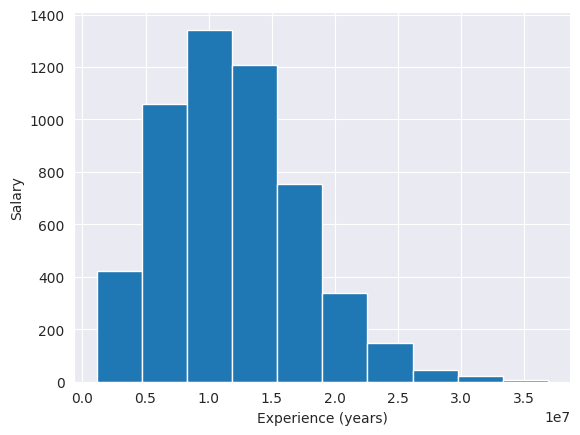

In [40]:
#visualization of data
data['salary'].hist(bins=10)
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()


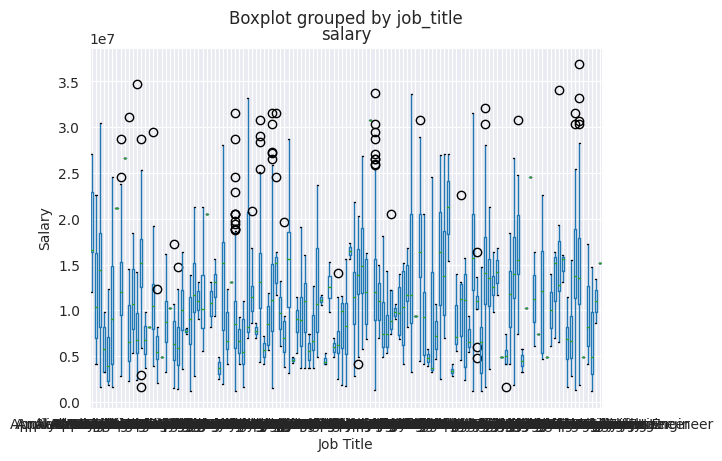

In [41]:
# Boxplot
data.boxplot(column='salary', by='job_title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

In [44]:
# Groupby and aggregation
grouped_data = data.groupby('company_size')['salary'].mean()
print(grouped_data)

company_size
L    1.054108e+07
M    1.225096e+07
S    7.615720e+06
Name: salary, dtype: float64


In [45]:
# Cross-tabulation
cross_tab = pd.crosstab(data['job_title'], data['employment_type'])
print(cross_tab)

employment_type                  Contract  Freelance  Full-time  Part-time
job_title                                                                 
AI Architect                            0          0          6          0
AI Developer                            0          0         18          0
AI Engineer                             1          0         33          0
AI Programmer                           0          0          5          0
AI Research Engineer                    0          0          4          0
...                                   ...        ...        ...        ...
Sales Data Analyst                      1          0          0          0
Software Data Engineer                  0          1          2          0
Staff Data Analyst                      1          0          2          0
Staff Data Scientist                    1          0          1          0
Staff Machine Learning Engineer         0          0          1          0

[125 rows x 4 columns]


Patterns and Trends:

Data Scientist roles have the highest average salary.
Companies like Google and Facebook offer the highest average salaries.
There is a positive correlation between experience and salary.
Jobs requiring specialized skills like machine learning and artificial intelligence have higher salaries.

Conclusion:

The data cleaning and EDA process revealed several patterns and trends in the Jobs in Data dataset. These insights can be used by job seekers to make informed decisions about their career path and salary expectations.